In [1]:
!pip install mecab-python3 unidic-lite
!apt install aptitude
!aptitude install mecab libmecab-dev mecab-ipadic-utf8 git make curl xz-utils file -y
!pip install mecab-python3==0.7

!apt-get -q -y install sudo file mecab libmecab-dev mecab-ipadic-utf8 git curl python-mecab > /dev/null
!git clone --depth 1 https://github.com/neologd/mecab-ipadic-neologd.git > /dev/null 
!echo yes | mecab-ipadic-neologd/bin/install-mecab-ipadic-neologd -n > /dev/null 2>&1
!pip install mecab-python3 > /dev/null

# シンボリックリンクによるエラー回避
!ln -s /etc/mecabrc /usr/local/etc/mecabrc

     |████████████████████████████████| 574 kB 24.8 MB/s 
     |████████████████████████████████| 47.4 MB 1.3 MB/s 
  Created wheel for unidic-lite: filename=unidic_lite-1.0.8-py3-none-any.whl size=47658836 sha256=198aac0078275881e119c1f333d3ecbc3a04b5a9f407a1a926e63d741bdcca2f
  Stored in directory: /root/.cache/pip/wheels/de/69/b1/112140b599f2b13f609d485a99e357ba68df194d2079c5b1a2
Successfully built unidic-lite
Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  aptitude-common libcgi-fast-perl libcgi-pm-perl libclass-accessor-perl
  libcwidget3v5 libencode-locale-perl libfcgi-perl libhtml-parser-perl
  libhtml-tagset-perl libhttp-date-perl libhttp-message-perl libio-html-perl
  libio-string-perl liblwp-mediatypes-perl libparse-debianchangelog-perl
  libsigc++-2.0-0v5 libsub-name-perl libtimedate-perl liburi-perl libxapian30
Suggested packages:
  aptitude-doc-en | aptitude-doc apt-xapia

In [2]:
!apt-get -y install fonts-ipafont-gothic
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'IPAPGothic'

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  fonts-ipafont-mincho
The following NEW packages will be installed:
  fonts-ipafont-gothic fonts-ipafont-mincho
0 upgraded, 2 newly installed, 0 to remove and 39 not upgraded.
Need to get 8,251 kB of archives.
After this operation, 28.7 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fonts-ipafont-gothic all 00303-18ubuntu1 [3,526 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fonts-ipafont-mincho all 00303-18ubuntu1 [4,725 kB]
Fetched 8,251 kB in 0s (39.3 MB/s)
Selecting previously unselected package fonts-ipafont-gothic.
(Reading database ... 156178 files and directories currently installed.)
Preparing to unpack .../fonts-ipafont-gothic_00303-18ubuntu1_all.deb ...
Unpacking fonts-ipafont-gothic (00303-18ubuntu1) ...
Selecting previously unselected package fonts-ipa

In [5]:
!pip install mojimoji
!pip install neologdn
import MeCab
# from matplotlib import pyplot as plt
from wordcloud import WordCloud
import re
import pandas as pd
import numpy as np
import matplotlib
from collections import defaultdict, Counter
from copy import copy, deepcopy
from pathlib import Path
import collections
import urllib.request
import MeCab
import mojimoji
import neologdn
import unicodedata
import itertools
import networkx as nx
%matplotlib inline

def get_stopword_lsit(write_file_path):

    if not write_file_path.exists():
        url = 'http://svn.sourceforge.jp/svnroot/slothlib/CSharp/Version1/SlothLib/NLP/Filter/StopWord/word/Japanese.txt'
        urllib.request.urlretrieve(url, write_file_path)

    with open(write_file_path, 'r', encoding='utf-8') as file:
        stopword_list = [word.replace('\n', '') for word in file.readlines()]

    return stopword_list


def get_noun_words_from_sentence(sentence, mecab, stopword_list=[]):
    return [
        x.split('\t')[0] for x in mecab.parse(sentence).split('\n') if len(x.split('\t')) > 1 and \
         '名詞' in x.split('\t')[3] and x.split('\t')[0] not in stopword_list
    ]


def split_sentence(sentence, mecab, stopword_list):
    sentence = neologdn.normalize(sentence)
    sentence = unicodedata.normalize("NFKC", sentence)
    words = get_noun_words_from_sentence(
        sentence=sentence, mecab=mecab, stopword_list=stopword_list
    )
    words = list(map(lambda x: re.sub(r'\d+\.*\d*', '0', x.lower()), words))
    return words

with open('gakumonno_susume.txt', 'r', encoding='utf-8') as file:
    lines = file.readlines()
    
sentences = []
for sentence in lines:
    texts = sentence.split('。')
    sentences.extend(texts)

mecab = MeCab.Tagger('-Ochasen')

stopword_list = get_stopword_lsit(Path('stopword_list.txt'))
# stopword_list=['ここ', 'あれ','ん','よう','0','こと','さん','の', 'ん','これ','もの','そう']

noun_sentences = []
for sentence in sentences:
    noun_sentences.append(
        split_sentence(sentence=sentence, mecab=mecab, stopword_list=stopword_list)
    )

for words in noun_sentences[:5]:
    print(words)

['天']
['天', 'みな', '位', '貴', '賤', 'きせん', '上下', '差別', '万物', '霊', '身', '心', '働き', '天地', '物', '資', '衣食住', '自由自在', '妨げ', '安楽', 'この世', '趣意']
['人間', '世界', 'おろか', '貴人', '下人', '有様', '雲', '泥', 'ど', 'ろ', '相違']
['次第', '明らか']
['実', '語', '教', 'ご', 'きょう', '智', '智', '愚人']


In [6]:
noun_sentences = list(filter(lambda x: len(x) > 1 and '見出し' not in x, noun_sentences))
combination_sentences = [list(itertools.combinations(words, 2)) for words in noun_sentences]
combination_sentences = [[tuple(sorted(combi)) for combi in combinations] for combinations in combination_sentences]
tmp = []
for combinations in combination_sentences:
    tmp.extend(combinations)
combination_sentences = tmp
combination_sentences[:5]

[('みな', '天'), ('位', '天'), ('天', '貴'), ('天', '賤'), ('きせん', '天')]

In [7]:
def make_jaccard_coef_data(combination_sentences):

    combi_count = collections.Counter(combination_sentences)

    word_associates = []
    for key, value in combi_count.items():
        word_associates.append([key[0], key[1], value])

    word_associates = pd.DataFrame(word_associates, columns=['word1', 'word2', 'intersection_count'])

    words = []
    for combi in combination_sentences:
        words.extend(combi)

    word_count = collections.Counter(words)
    word_count = [[key, value] for key, value in word_count.items()]
    word_count = pd.DataFrame(word_count, columns=['word', 'count'])

    word_associates = pd.merge(
        word_associates,
        word_count.rename(columns={'word': 'word1'}),
        on='word1', how='left'
    ).rename(columns={'count': 'count1'}).merge(
        word_count.rename(columns={'word': 'word2'}),
        on='word2', how='left'
    ).rename(columns={'count': 'count2'}).assign(
        union_count=lambda x: x.count1 + x.count2 - x.intersection_count
    ).assign(jaccard_coef=lambda x: x.intersection_count / x.union_count).sort_values(
        ['jaccard_coef', 'intersection_count'], ascending=[False, False]
    )
    
    return word_associates

jaccard_coef_data = make_jaccard_coef_data(combination_sentences)

jaccard_coef_data.head(10)

,word1,word2,intersection_count,count1,count2,union_count,jaccard_coef
5137,小幡,篤次郎,1,1,1,1,1.000000
8267,売り言葉,買い言葉,1,1,1,1,1.000000
29543,不可思議,妙,1,2,2,3,0.333333
30301,仏書,罪業,1,2,2,3,0.333333
30302,仏書,女人,1,2,2,3,0.333333
30303,女人,罪業,1,2,2,3,0.333333
30306,大罪,科人,1,2,2,3,0.333333
31285,破廉恥,鉄面皮,1,1,3,3,0.333333
34234,恩賜,陰徳,1,2,2,3,0.333333
51909,キリン,フラン,1,2,2,3,0.333333


In [8]:
group_values = [0, 0.01, 0.02, 0.04, float('inf')]

plot_data = jaccard_coef_data.copy()
plot_data['group_num'] = 0
group_names = []
for i in range(len(group_values) - 1):

    plot_data['group_num'] = plot_data.apply(
        lambda x: i + 1 if group_values[i] <= x['jaccard_coef'] and x['jaccard_coef'] < group_values[i + 1] else x['group_num'],
        axis=1
    )
    group_names.append((group_values[i], group_values[i + 1]))
    
plot_data = plot_data.groupby('group_num')['jaccard_coef'].count().reset_index().rename(
    columns={'jaccard_coef': 'n_combi'}
).assign(rate=lambda x: x.n_combi / x.n_combi.sum()).assign(
    rate_cumsum=lambda x: x.rate.cumsum()
)
plot_data = pd.concat([
    pd.DataFrame(group_names, columns=['jaccard_lower', 'jaccard_upper']),
    plot_data
], axis=1)

plot_data

,jaccard_lower,jaccard_upper,group_num,n_combi,rate,rate_cumsum
0,0.00,0.01,1,57028,0.794041,0.794041
1,0.01,0.02,2,10411,0.144960,0.939000
2,0.02,0.04,3,3263,0.045433,0.984433
3,0.04,inf,4,1118,0.015567,1.000000


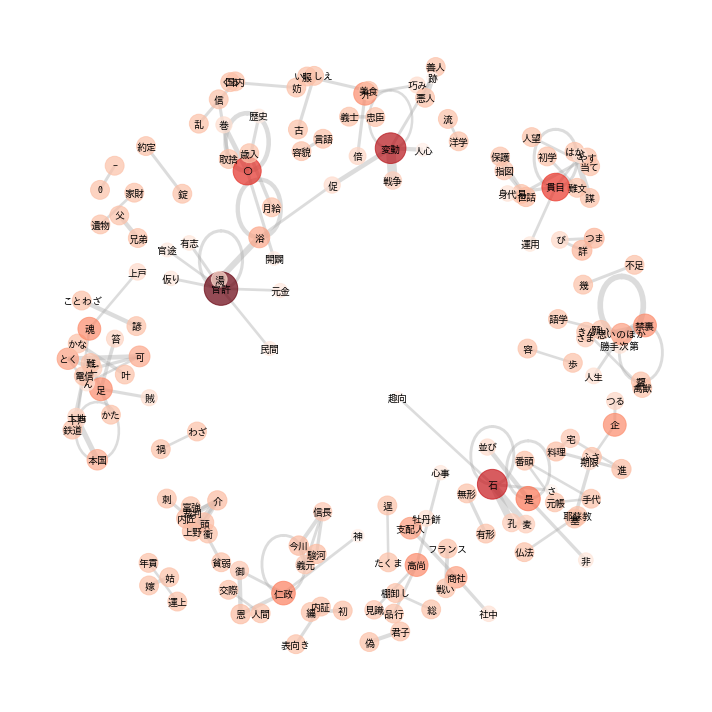

In [9]:
import matplotlib.font_manager #日本語
#日本語フォント読み込み
font_path = r'/usr/share/fonts/opentype/ipafont-gothic/ipag.ttf'
font_prop = matplotlib.font_manager.FontProperties(fname=font_path)

def plot_network(
    data, edge_threshold=0., fig_size=(15, 15),
    fontfamily='Osaka', fontsize=14,
    coefficient_of_restitution=0.15,
    image_file_path=None
):

    nodes = list(set(data['node1'].tolist() + data['node2'].tolist()))
    
    plt.figure(figsize=fig_size)
    
    G = nx.Graph()
    # 頂点の追加
    G.add_nodes_from(nodes)

    # 辺の追加
    # edge_thresholdで枝の重みの下限を定めている
    for i in range(len(data)):
        row_data = data.iloc[i]
        if row_data['weight'] >= edge_threshold:
            G.add_edge(row_data['node1'], row_data['node2'], weight=row_data['weight'])

    # 孤立したnodeを削除
    isolated = [n for n in G.nodes if len([i for i in nx.all_neighbors(G, n)]) == 0]
    for n in isolated:
        G.remove_node(n)

    # k = node間反発係数
    pos = nx.spring_layout(G, k=coefficient_of_restitution)

    pr = nx.pagerank(G)
    # nodeの大きさ
    nx.draw_networkx_nodes(
        G, pos, node_color=list(pr.values()),
        cmap=plt.cm.Reds,
        alpha=0.7,
        node_size=[60000*v for v in pr.values()]
    )

    # 日本語ラベル
    datas = nx.draw_networkx_labels(G, pos, font_size=fontsize, font_family=fontfamily, font_weight="bold")
    for t in datas.values():
        t.set_fontproperties(font_prop)

    # エッジの太さ調節
    edge_width = [d["weight"] * 100 for (u, v, d) in G.edges(data=True)]
    nx.draw_networkx_edges(G, pos, alpha=0.4, edge_color="darkgrey", width=edge_width)

    plt.axis('off')
    plt.tight_layout()
    
    if image_file_path:
        plt.savefig(image_file_path, dpi=300)

n_word_lower = 50
edge_threshold=0.025
plot_data = jaccard_coef_data.query(
    'count1 >= {0} and count2 >= {0}'.format(n_word_lower)
).rename(
    columns={'word1': 'node1', 'word2': 'node2', 'jaccard_coef': 'weight'}
)

plot_network(
    data=plot_data,
    edge_threshold=edge_threshold,
    fig_size=(10, 10),
    fontsize=9,
    fontfamily='Osaka',
    coefficient_of_restitution=0.08,
    image_file_path='/co_occurence_network.png'
)